## Задача 1

Постройте график

Назовите график

Сделайте именование оси x и оси y

Сделайте выводы

### 1.1. Скачать данные по ссылке https://www.kaggle.com/datasets/esratmaria/house-price-dataset-with-other-information

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### 1.2 Изучите стоимости недвижимости

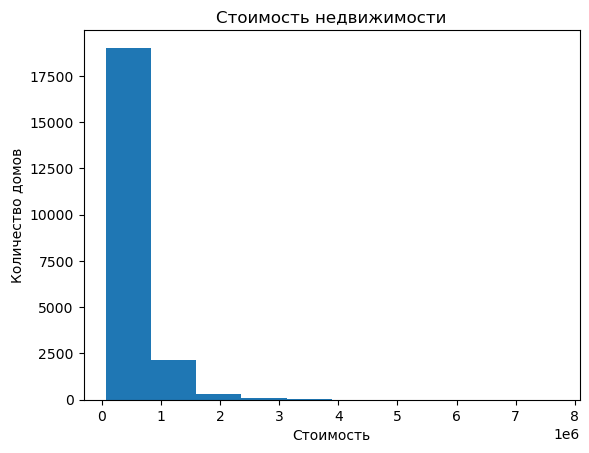

In [3]:
plt.hist(df['price'])
plt.title('Стоимость недвижимости')
plt.xlabel('Стоимость')
plt.ylabel('Количество домов');

### 1.3 Изучите распределение квадратуры жилой

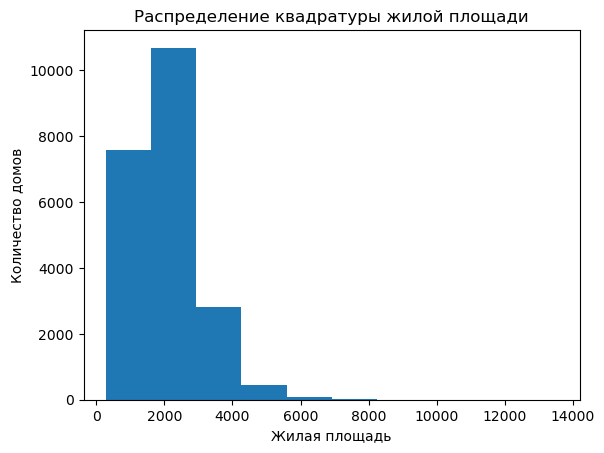

In [4]:
plt.hist(df['sqft_living'])
plt.title('Распределение квадратуры жилой площади')
plt.xlabel('Жилая площадь')
plt.ylabel('Количество домов');

### 1.4 Изучите распределение года постройки

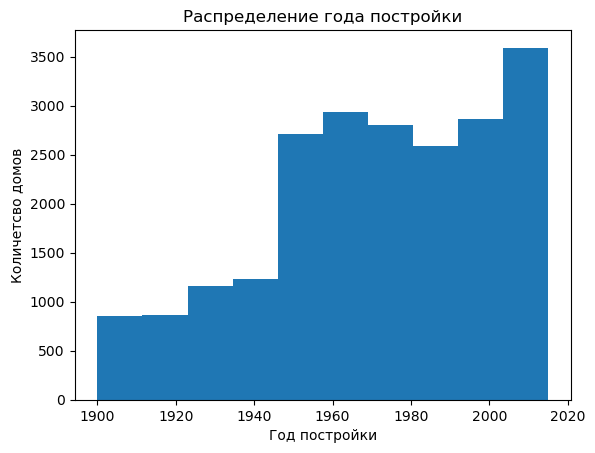

In [5]:
plt.hist(df['yr_built'])
plt.title('Распределение года постройки')
plt.xlabel('Год постройки')
plt.ylabel('Количетсво домов');

## 2 задача

### 2.1 Изучите распределение домов от наличия вида на набережную

Постройте график

Сделайте выводы

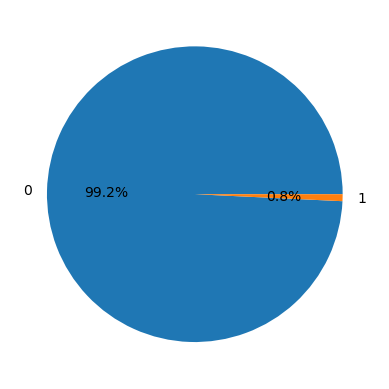

In [6]:
plt.pie(df['waterfront'].value_counts().values, autopct = '%1.1f%%', labels = df['waterfront'].value_counts().index);

### 2.2 Изучите распределение этажей домов

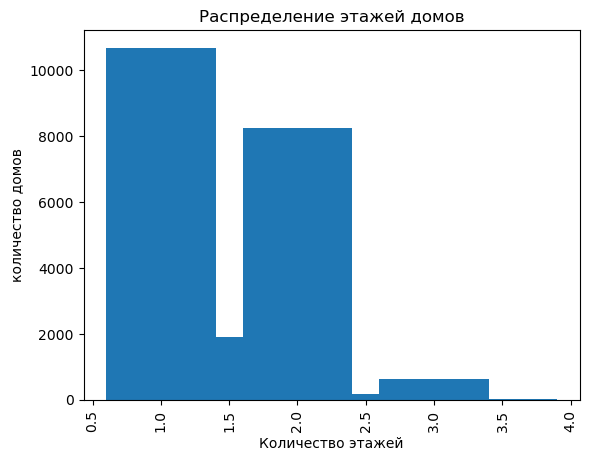

In [7]:
floors_count = df['floors'].value_counts()

index_values = floors_count.values
index_names = floors_count.index

plt.bar(index_names, index_values)
plt.title('Распределение этажей домов')
plt.xlabel('Количество этажей')
plt.ylabel('количество домов')
plt.xticks(rotation = 90);

### 2.3 Изучите распределение состояния домов

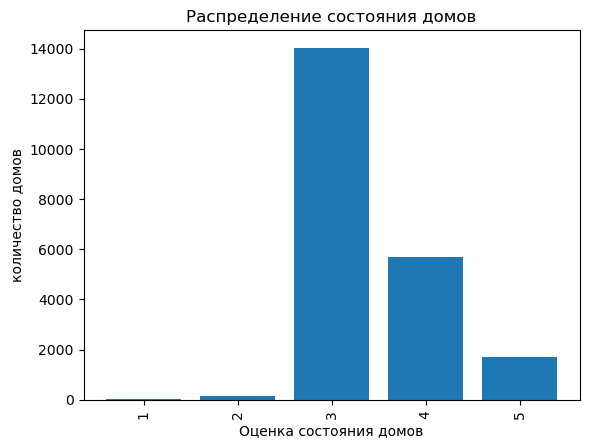

In [8]:
conditions = df['condition'].value_counts()

index_values = conditions.values
index_names = conditions.index

plt.bar(index_names, index_values)
plt.title('Распределение состояния домов')
plt.xlabel('Оценка состояния домов')
plt.ylabel('количество домов')
plt.xticks(rotation = 90);

## 3 задача

Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.

Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

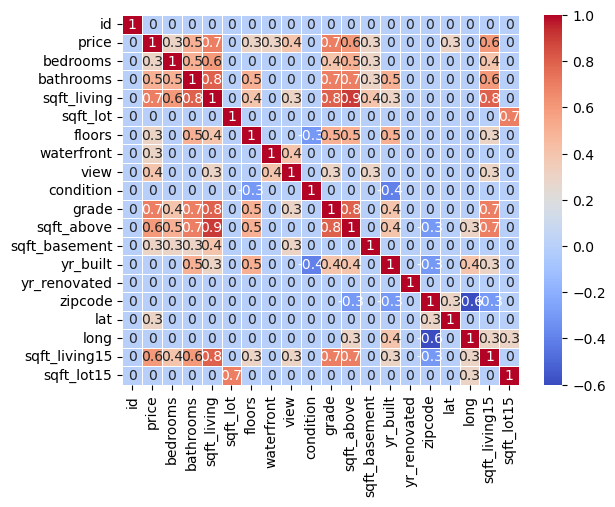

In [9]:
matrix = df.corr()
matrix = np.round(matrix, 1)
matrix[np.abs(matrix) < 0.3] = 0
matrix
sns.heatmap(matrix, annot = True, linewidths= 0.5, cmap= 'coolwarm');

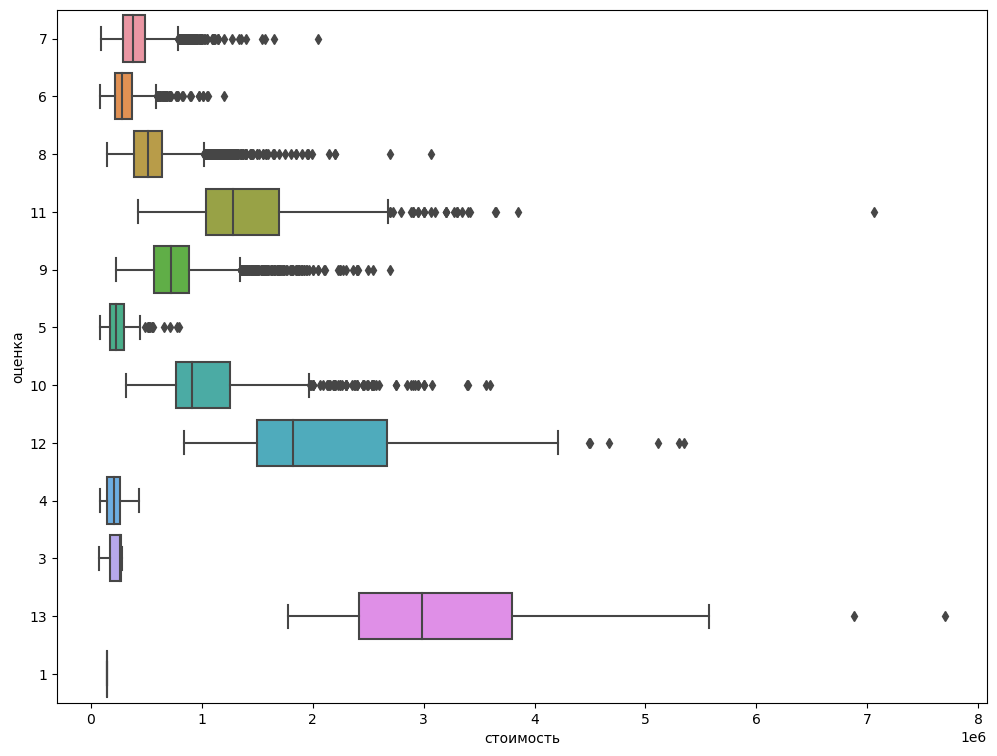

In [10]:
plt.figure(figsize=(12, 9))
sns.boxplot(x=df['price'], y=df['grade'].astype('str'), whis=1.5)
plt.xlabel('стоимость')
plt.ylabel('оценка');

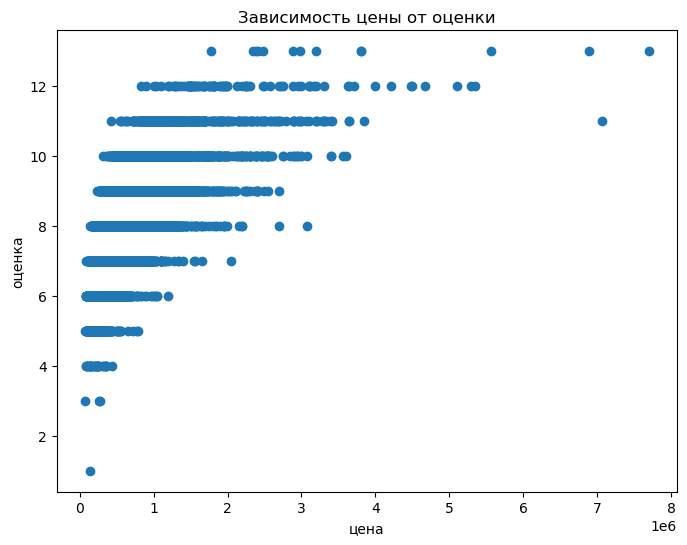

In [11]:
plt.figure(figsize=(8, 6))
plt.scatter(df['price'], df['grade'])
plt.title('Зависимость цены от оценки')
plt.xlabel('цена')
plt.ylabel('оценка');

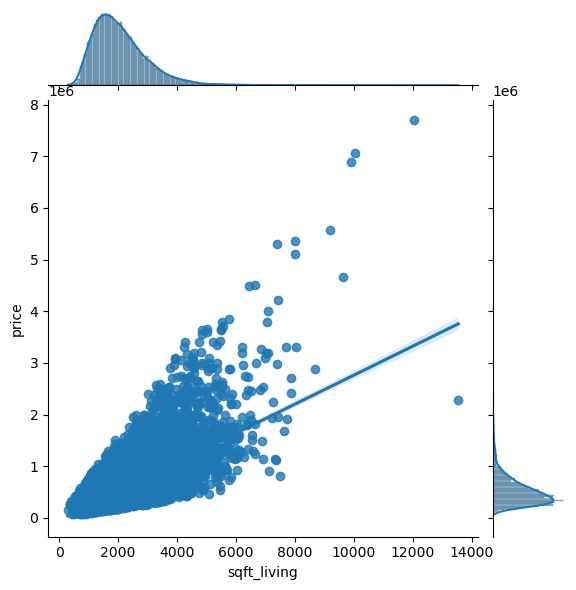

In [12]:
sns.jointplot(x=df['sqft_living'], y=df['price'], kind='reg');